# Supermarket Sales Data Analysis for first quarter of the year

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df=pd.read_csv('supermarket_sales.csv')

# Data Preprocessing

In [41]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [42]:
df.shape

(1000, 17)

In [43]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [44]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [49]:
 df['Date']=pd.to_datetime(df['Date'])

In [50]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [51]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


# Exploratory Data Analysis

In [52]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

## Analysis based on Gender

### Male to female ratio

Text(0.5, 1.0, 'Male to female ratio')

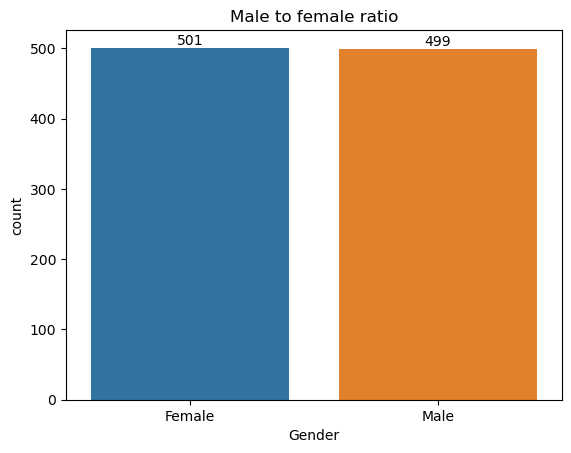

In [96]:
 countplot=sns.countplot(x='Gender',data=df)
 for bars in countplot.containers:
    countplot.bar_label(bars)
plt.title('Male to female ratio')

### Purchasing Power of male and female

In [54]:
sales_distribution=df.groupby(['Gender'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)

Text(0.5, 1.0, 'Purchasing Power of male and female')

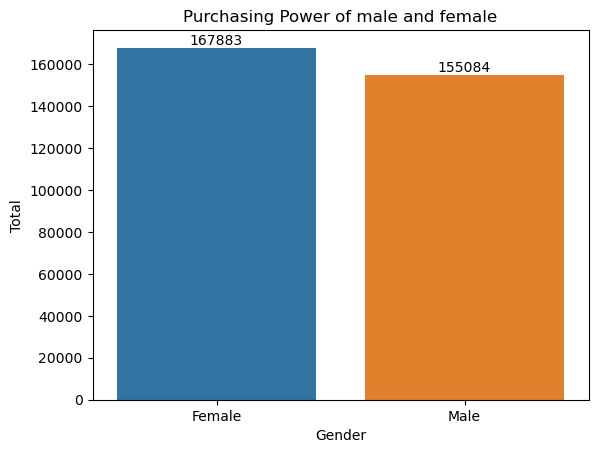

In [97]:
barplot1=sns.barplot(x='Gender',y='Total',data=sales_distribution)
for i in barplot1.containers:
    barplot1.bar_label(i)
plt.title('Purchasing Power of male and female')

### Male to female ratio based on Membership type

Text(0.5, 1.0, 'Male to female ratio based on Membership type')

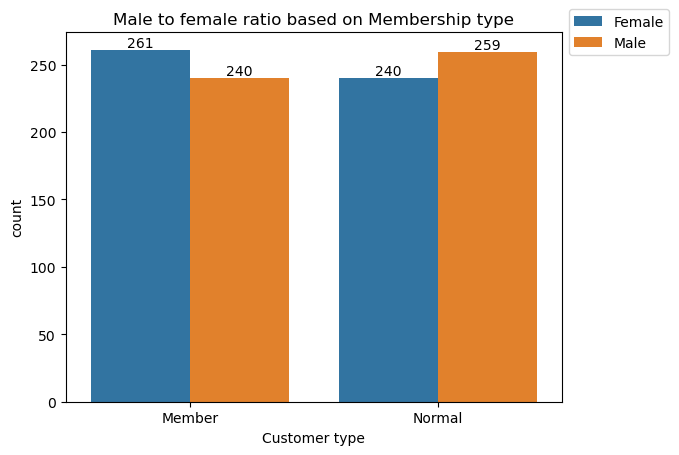

In [98]:
plot=sns.countplot(data=df,x='Customer type',hue='Gender')
for bars in plot.containers:
    plot.bar_label(bars)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Male to female ratio based on Membership type')

## Mode of Payment used and revenue generated from each mode

Text(0.5, 1.0, 'Mode of Payment used and revenue generated from each mode')

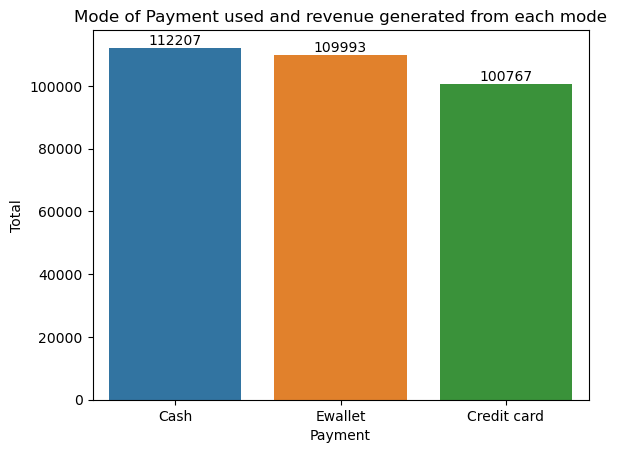

In [99]:
payment_mode=df.groupby(['Payment'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
barplot4=sns.barplot(x='Payment',y='Total',data=payment_mode)
for i in barplot4.containers:
    barplot4.bar_label(i)
plt.title('Mode of Payment used and revenue generated from each mode')

## Analysis on Line of Products

### Total revenue of each product line

In [59]:
product_distribution=df.groupby(['Product line'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)

Text(0.5, 1.0, 'Total revenue of each product line')

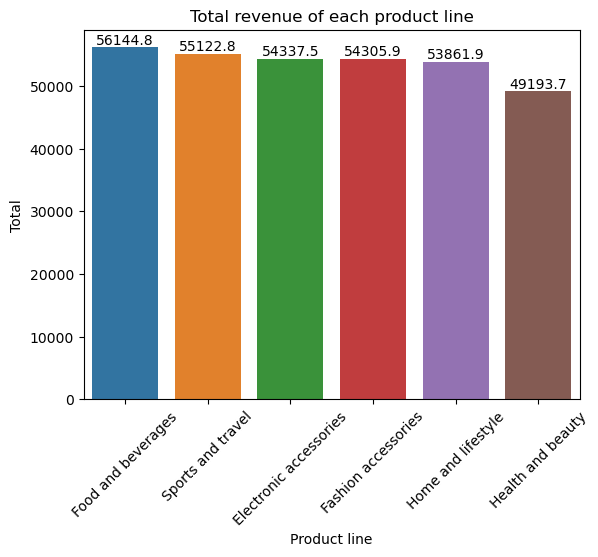

In [101]:
barplot3=sns.barplot(x='Product line',y='Total',data=product_distribution)
for i in barplot3.containers:
    barplot3.bar_label(i)
plt.xticks(rotation=45)
plt.title('Total revenue of each product line')

### Gross income of each line of products

Text(0.5, 1.0, 'Gross income of each line of products')

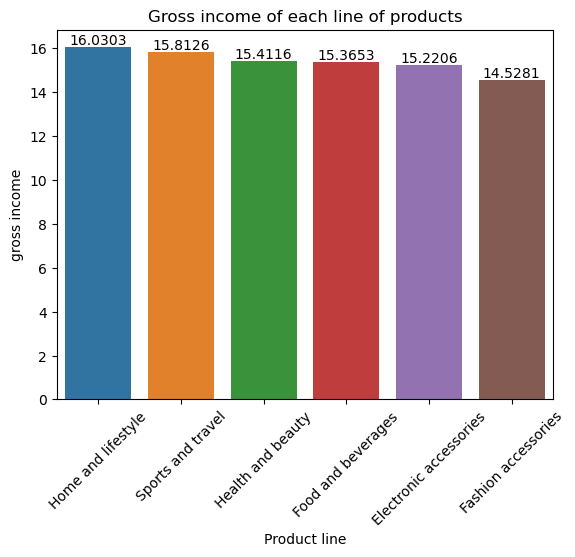

In [100]:
product_gross=df.groupby(['Product line'],as_index=False)['gross income'].mean().sort_values(by='gross income',ascending=False)
barplot5=sns.barplot(x='Product line',y='gross income',data=product_gross)
for i in barplot5.containers:
    barplot5.bar_label(i)
plt.xticks(rotation=45)
plt.title('Gross income of each line of products')

### Average rating of various product lines

Text(0.5, 1.0, 'Average rating of various product lines')

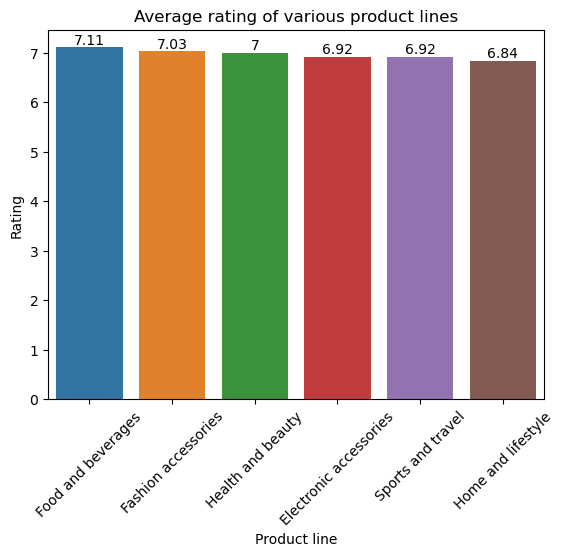

In [102]:
product_ratings=df.groupby(['Product line'],as_index=False)['Rating'].mean().round(2).sort_values(by='Rating',ascending=False)
bar6=sns.barplot(x='Product line',y='Rating',data=product_ratings)
for i in bar6.containers:
    bar6.bar_label(i)
plt.xticks(rotation=45)
plt.title('Average rating of various product lines')

### Quantity sold for each Product lines

Text(0.5, 1.0, 'Quantity sold for each Product lines')

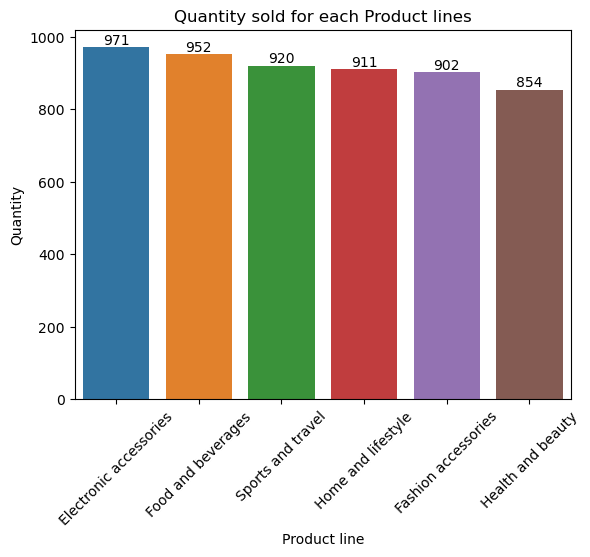

In [103]:
product_ratings=df.groupby(['Product line'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
bar7=sns.barplot(x='Product line',y='Quantity',data=product_ratings)
for i in bar7.containers:
    bar7.bar_label(i)
plt.xticks(rotation=45)
plt.title('Quantity sold for each Product lines')

### Gender-wise distribution of purchases across various product lines

Text(0.5, 1.0, 'Gender-wise distribution of purchases across various product lines')

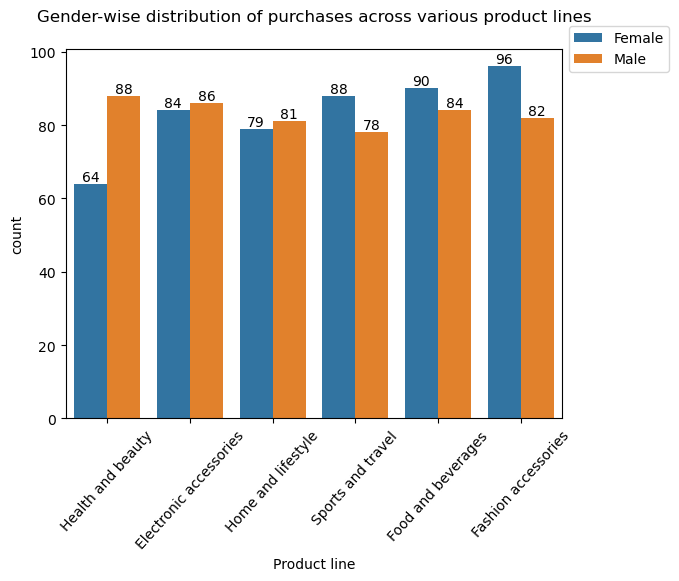

In [116]:
product_gender_distribution=sns.countplot(data=df,x='Product line',hue='Gender')
for bars in product_gender_distribution.containers:
    product_gender_distribution.bar_label(bars)
plt.xticks(rotation=48)
plt.legend(loc='center left', bbox_to_anchor=(1, 1))
plt.title('Gender-wise distribution of purchases across various product lines',pad=20)

### Citywise revenue distribution of various product lines

Text(0.5, 1.0, 'Citywise revenue distribution of various product lines')

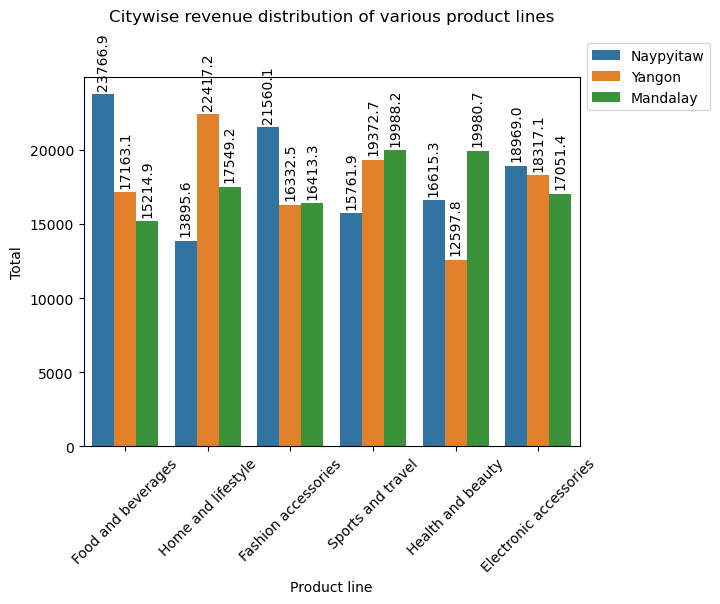

In [118]:
citywise_product_sale=df.groupby(['City','Product line'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
bar8=sns.barplot(x='Product line',y='Total',hue='City',data=citywise_product_sale)
for i in bar8.containers:
    bar8.bar_label(i, padding=3, fontsize=10, rotation=90, fmt='%.1f')
plt.legend(loc='center left', bbox_to_anchor=(1,1))
plt.xticks(rotation=45)
plt.title('Citywise revenue distribution of various product lines',pad=40)

## Citywise Analysis

### City with Highest Sale

In [92]:
city=df.groupby('City')['gross income'].sum()
max_income_city=city.idxmax()
max_income_city

'Naypyitaw'

In [57]:
city_income=df.groupby(['City'],as_index=False)['Total'].sum()

Text(0.5, 1.0, 'Individual sales of each city')

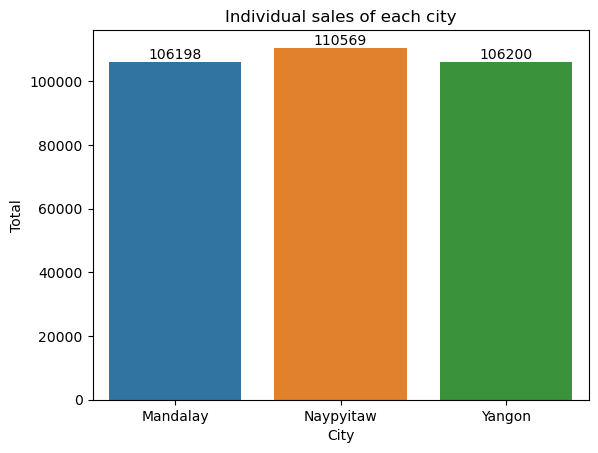

In [119]:
barplot2=sns.barplot(x='City',y='Total',data=city_income)
for i in barplot2.containers:
    barplot2.bar_label(i)
plt.title('Individual sales of each city')

### Membership status in each city

Text(0.5, 1.0, 'Membership status in each city')

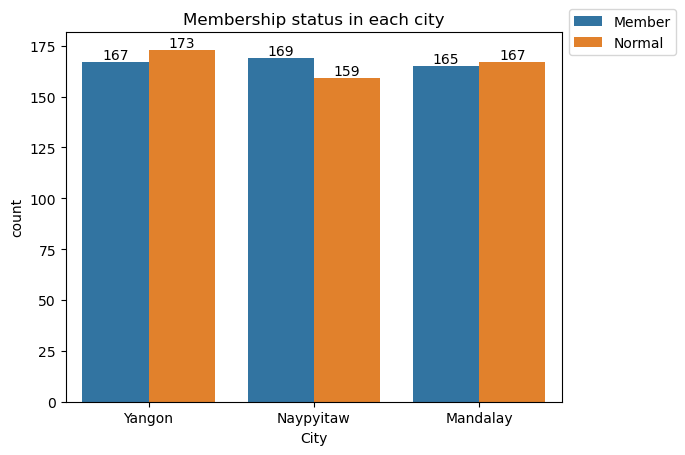

In [120]:
city_customertype=sns.countplot(data=df,x='City',hue='Customer type')
for i in city_customertype.containers:
    city_customertype.bar_label(i)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Membership status in each city')

### Distribution of Payment modes in each city

Text(0.5, 1.0, 'Distribution of Payment modes in each city')

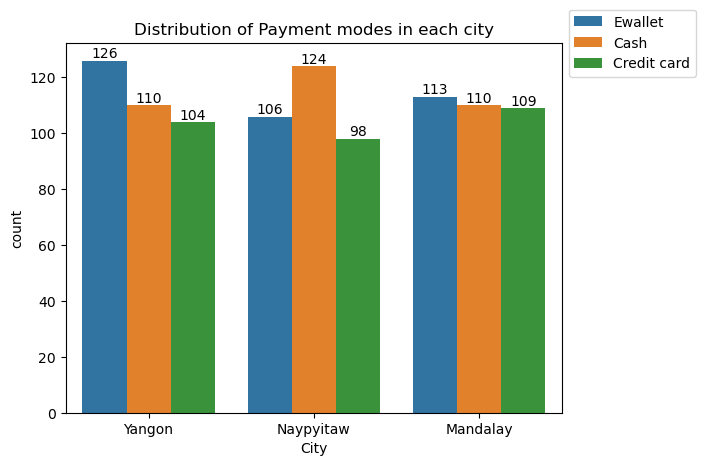

In [121]:
city_payment_type=sns.countplot(data=df,x='City',hue='Payment')
for i in city_payment_type.containers:
    city_payment_type.bar_label(i)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Distribution of Payment modes in each city')

### Genderwise Distribution in each city

Text(0.5, 1.0, 'Genderwise Distribution in each city')

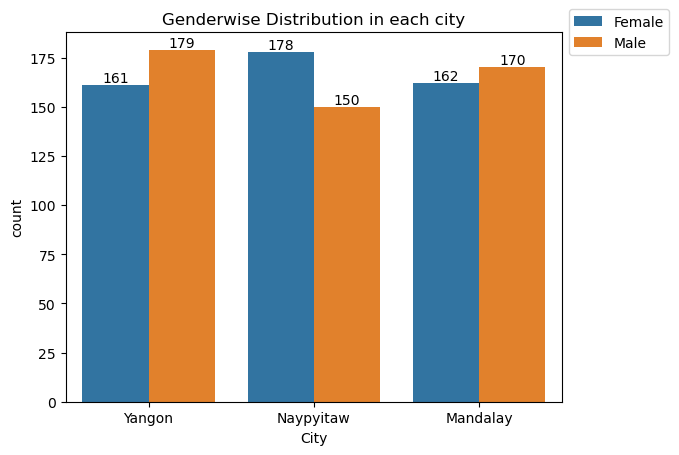

In [122]:
city_gender=sns.countplot(data=df,x='City',hue='Gender')
for i in city_gender.containers:
    city_gender.bar_label(i)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Genderwise Distribution in each city')

### Revenue generated from various product lines in each city

Text(0.5, 1.0, 'Revenue generated from various product lines in each city')

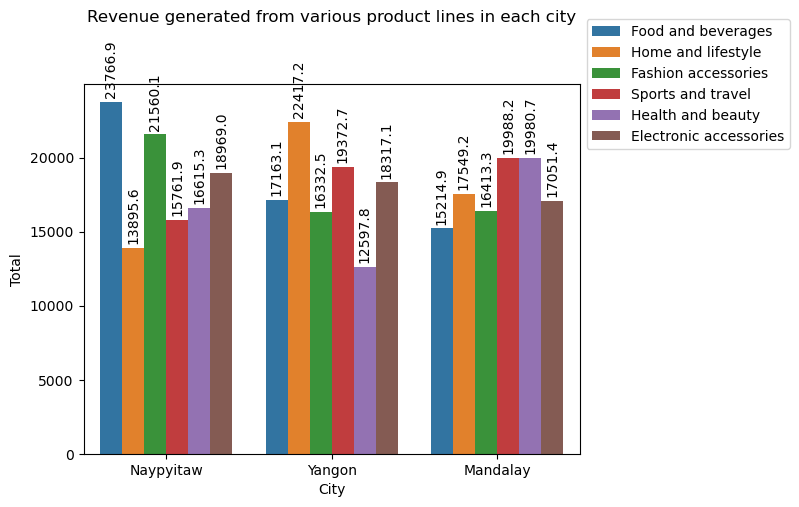

In [124]:
citywise_product_sale=df.groupby(['City','Product line'],as_index=False)['Total'].sum().sort_values(by='Total',ascending=False)
bar9=sns.barplot(x='City',y='Total',hue='Product line',data=citywise_product_sale)
for i in bar9.containers:
    bar9.bar_label(i, padding=3, fontsize=10, rotation=90, fmt='%.1f')
plt.legend(loc='center left', bbox_to_anchor=(1,1))
plt.title('Revenue generated from various product lines in each city',pad=45)

### Top Product lines in each city

Text(0.5, 1.0, 'Top Product lines in each city')

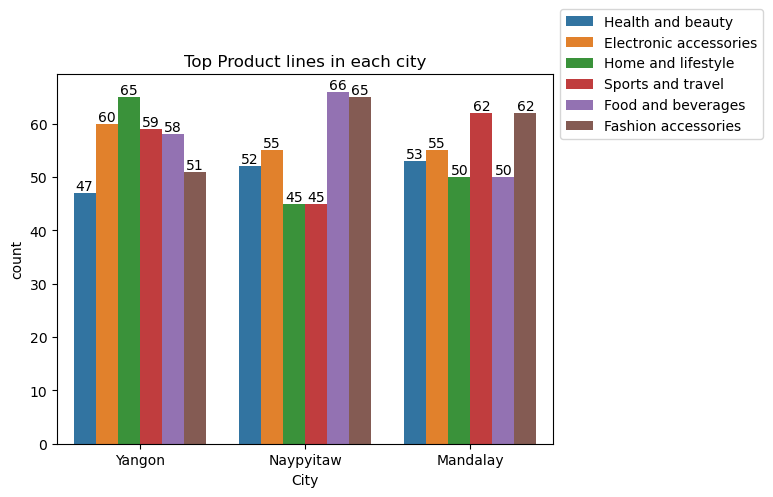

In [125]:
citywise_product_count=sns.countplot(x='City',hue='Product line',data=df)
for i in citywise_product_count.containers:
    citywise_product_count.bar_label(i)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Top Product lines in each city')

## Analysis by Date

In [63]:
sale_by_date_city=df.groupby(['Date','City'],as_index=False)['Total'].sum()
sale_by_date_city

,Date,City,Total
0,2019-01-01,Mandalay,1536.6960
1,2019-01-01,Naypyitaw,837.1650
2,2019-01-01,Yangon,2371.3200
3,2019-01-02,Mandalay,1162.8015
4,2019-01-02,Naypyitaw,475.6500
...,...,...,...
258,2019-03-29,Naypyitaw,985.6980
259,2019-03-29,Yangon,977.6130
260,2019-03-30,Mandalay,1724.4570
261,2019-03-30,Naypyitaw,1441.9860


### Highest sale day along with city

In [64]:
highest_sale_day=sale_by_date_city.loc[sale_by_date_city['Total'].idxmax()]
highest_sale_day

Date     2019-01-23 00:00:00
City               Naypyitaw
Total               3632.874
Name: 65, dtype: object

In [72]:
min_date=df['Date'].min()
max_date=df['Date'].max()
print(f"The date range is from {min_date} to {max_date}")

The date range is from 2019-01-01 00:00:00 to 2019-03-30 00:00:00


### Monthwise Revenue Generated for each Product lines

C:\Users\achar\AppData\Local\Temp\ipykernel_24632\661393136.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthwise_sales=df.groupby(['Month','Product line'],as_index=False)['Total'].sum().round().sort_values(by='Total',ascending=False)
C:\Users\achar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\achar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain 

Text(0.5, 0, 'Months')

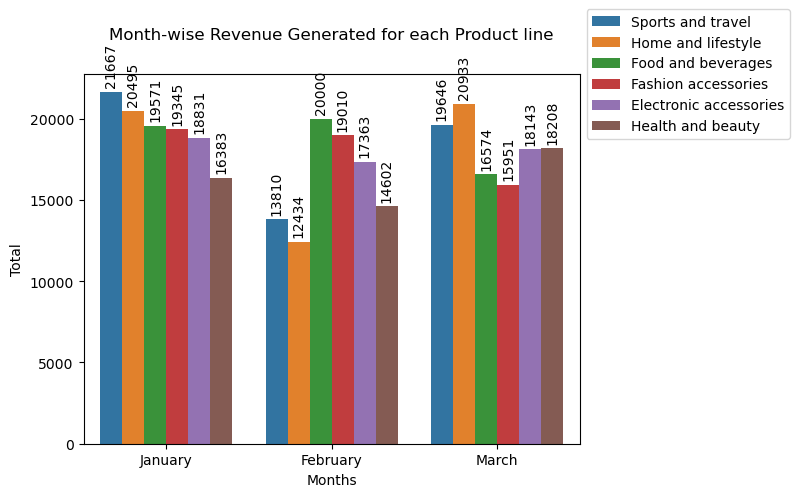

In [89]:
df['Month']=df['Date'].dt.month_name()
month_order=['January','February','March']
df['Month']=pd.Categorical(df['Month'],categories=month_order,ordered=True)
monthwise_sales=df.groupby(['Month','Product line'],as_index=False)['Total'].sum().round().sort_values(by='Total',ascending=False)
bar10=sns.barplot(x='Month',y='Total',hue='Product line',data=monthwise_sales)
for i in bar10.containers:
    bar10.bar_label(i,rotation=90,padding=3)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Month-wise Revenue Generated for each Product line',pad=25)
plt.xlabel('Months')

### Highest Selling Product of each month

C:\Users\achar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\achar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0.5, 1.0, 'Highest Selling Product of each month')

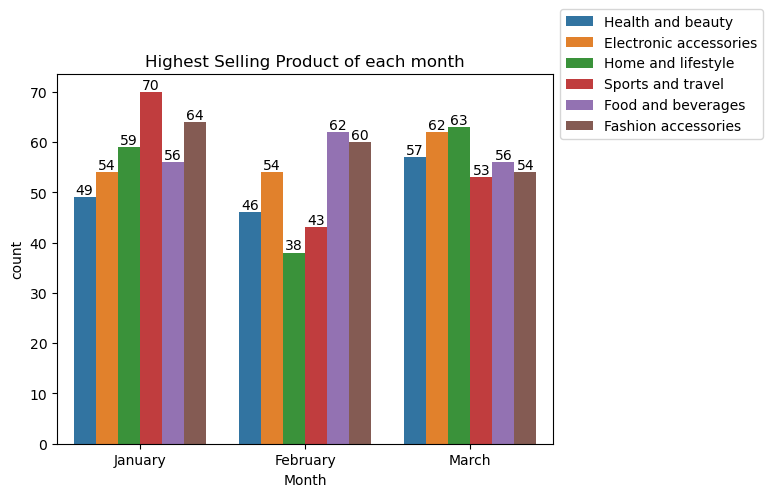

In [126]:
highest_selling_prod=sns.countplot(x='Month',hue='Product line',data=df)
for i in highest_selling_prod.containers:
    highest_selling_prod.bar_label(i)
plt.legend(loc='center left',bbox_to_anchor=(1,1))
plt.title('Highest Selling Product of each month')